<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 10 Работа с признаками

Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров.

Ваша задача состоит в следующем:

1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

## Модель предсказания инфартка миокарда

Описание Датасета
im – целевая переменная (инфаркт миокарда). Здесь и в других столбцах в качестве наличия признака - ‘1’, отсутствие – ‘0’.

man/female мужчины - ‘1’, женщины - ‘0’.

Smoking/Alcoholism - курение и алкоголизм

Fatness - ожирение

Diabetes - повышенный уровень глюкозы в крови

Hyperlipidemia - гиперлипидемия

Physical Inactivity - низкая физическая активность

Arterial Hypertension - артериальная гипертензия

перенесенный ранее инфаркт (AnamnezIM)

наличие фибрилляции предсердий как сопутствующая патология (FP)

FV LV - фракция выброса левого желудочка по УЗИ сердца (%);

TROPONIN - уровень тропонина (нг/мл);

KFK - креатининфосфокиназа (нг/мл);

AST - аспартатаминотрансфераза (ед/л);

CREAT - креатинин (мкмоль/л);

CHOL - холестерин (ммоль/л);

HBA1C - гликированный гемоглобин (%);

GLUC - глюкоза (ммоль/л);

HB - гемоглобин (г/л);

COE - скорость оседания эритроцитов (мм/час);

PULS - пульс (уд/мин).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Чтение датасета

In [3]:
df = pd.read_excel('IM_dataset_2.xlsx')
df.head()

,IM,age,man/female,Fatness,Diabetes,Hyperlipidemia,ArterialHypertension,AnamnezIM,FP,FV LV,TROPONIN,KFK,AST,CREAT,CHOL,HBA1C,GLUC,HB,COE,PULS
0,1,70,1,0,1,0,1,0,0,64,3.14,12.90,41.0,69.0,3.71,6.1,6.9,150,10.0,63.0
1,1,79,0,0,1,0,1,0,0,51,6.90,NaN,77.0,76.0,4.55,6.1,9.5,74,50.0,66.0
2,1,57,1,0,0,1,0,0,0,60,9.55,5.52,138.0,63.0,5.52,NaN,4.3,145,NaN,67.0
3,1,59,1,0,0,0,1,0,0,55,7.15,NaN,28.0,67.0,4.83,NaN,5.1,117,NaN,65.0
4,1,80,0,0,1,0,1,0,0,58,0.10,NaN,49.0,98.0,4.40,6.6,12.0,126,NaN,81.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IM                    600 non-null    int64  
 1   age                   600 non-null    int64  
 2   man/female            600 non-null    int64  
 3   Fatness               600 non-null    int64  
 4   Diabetes              600 non-null    int64  
 5   Hyperlipidemia        600 non-null    int64  
 6   ArterialHypertension  600 non-null    int64  
 7   AnamnezIM             600 non-null    int64  
 8   FP                    600 non-null    int64  
 9   FV LV                 600 non-null    int64  
 10  TROPONIN              600 non-null    float64
 11  KFK                   133 non-null    float64
 12  AST                   597 non-null    float64
 13  CREAT                 597 non-null    float64
 14  CHOL                  589 non-null    float64
 15  HBA1C                 1

In [5]:
df.describe()

,IM,age,man/female,Fatness,Diabetes,Hyperlipidemia,ArterialHypertension,AnamnezIM,FP,FV LV,TROPONIN,KFK,AST,CREAT,CHOL,HBA1C,GLUC,HB,COE,PULS
count,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,133.000000,597.000000,597.000000,589.000000,160.000000,599.000000,600.000000,172.000000,594.000000
mean,0.331667,65.26000,0.538333,0.063333,0.280000,0.230000,0.928333,0.068333,0.141667,57.026667,2.164530,14.850226,48.919263,90.200335,4.690509,7.453750,7.632554,136.216667,17.569767,77.535354
std,0.471205,11.57522,0.498944,0.243765,0.449374,0.421184,0.258150,0.252528,0.348999,8.882612,6.059128,18.147052,89.371021,57.814164,1.219571,1.841584,3.619728,19.001091,13.044271,23.551807
min,0.000000,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.600000,3.000000,22.000000,1.600000,4.300000,2.500000,56.000000,2.000000,45.000000
25%,0.000000,57.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51.000000,0.050000,3.600000,19.000000,65.000000,3.900000,6.100000,5.500000,125.000000,8.000000,63.000000
50%,0.000000,65.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,58.000000,0.100000,5.590000,27.000000,80.000000,4.600000,7.000000,6.300000,137.000000,14.000000,71.000000
75%,1.000000,72.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,64.000000,0.482500,16.000000,41.000000,99.000000,5.400000,8.325000,8.250000,150.000000,22.000000,84.000000
max,1.000000,93.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,50.000000,60.000000,1511.000000,828.000000,9.300000,14.200000,29.000000,192.000000,60.000000,250.000000


## Предобработка данных

Проверим датасет на дубликаты

In [6]:
df.duplicated().sum()

1

Посмотрим на распределение датасета по возрасту

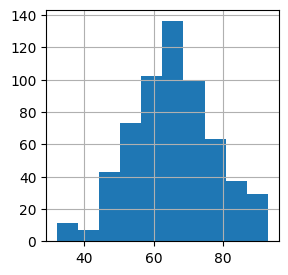

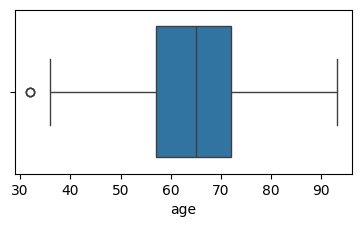

In [7]:
df['age'].hist(figsize=(3, 3));

plt.figure(figsize = (20,20))
for i,col in enumerate(['age']):
    plt.subplot(8,4,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

Есть выброс в столбце 'age', но для этого датасета, считаю это нормальным

Посмотрим на распределение больных инфарктом по возрасту

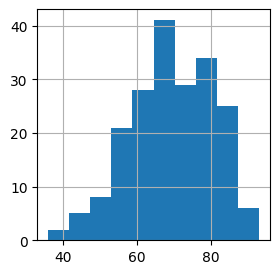

In [8]:
df[(df['IM'] == 1)]['age'].hist(figsize=(3, 3));

Посмотрим соотношение целевого признака

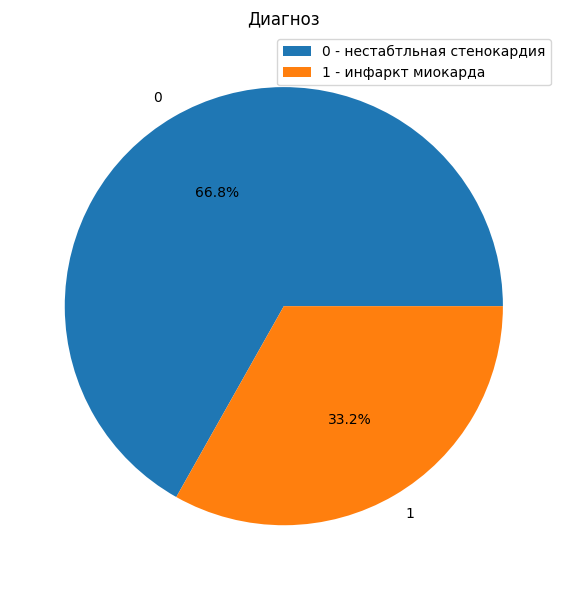

In [9]:
df.IM.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.legend(['0 - нестабтльная стенокардия', '1 - инфаркт миокарда'])
plt.title('Диагноз')
plt.tight_layout()
plt.axis('off');

Посмотрим корреляцию признаков

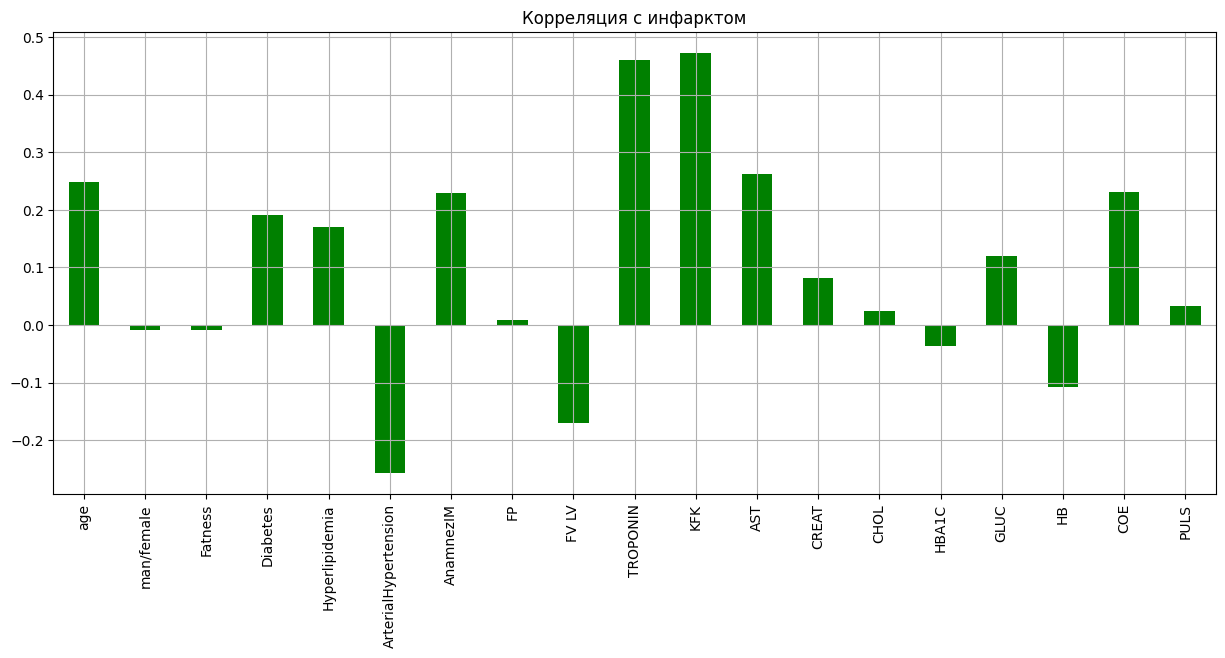

In [10]:
df.drop('IM', axis=1).corrwith(df.IM).plot(kind='bar', grid=True, figsize=(15, 6), title="Корреляция с инфарктом", color="green");

### Вывод по предобработке
В процессе предобработки данных датасет был проверен на дубликаты и пропуски, было проверено распределение датасета по возрасту, выявлены выбросы возраста, принятые за норму, исследована корреляция признаков по отношению к целевому признаку. Обращает на себя внимание отрицательная корреляция инфаркта с артериальной гипертензией. У больных инфарктом (всего 200 человек) в качестве сопутствующей патологии было 166 человек, страдавших гипертонией, то есть 83%. Но в данном датасете существует еще 400 человек, больных нестабильной стенокардией, среди которых гипертония встречается 391 раз (98%). Таким образом доказана обратная зависимость инфаркта миокарда от наличия гипертонии на фоне большей зависимости от нее нестабильной стенокардии. Что касается обратной связи инфаркта миокарда с фракцией выброса левого желудочка (‘FV LV’) и уровнем гемоглобина, то это действительно соответствует патогенезу острой ишемии миокарда, в процессе которого нарушается сократительная и насосная функция сердца, что выражается в снижении фракции выброса, нарушению газообмена в легких и, соответственно, в снижении уровня гемоглобина.

### Деление данных на признаки и целевой признак

In [17]:
X = df.drop(['IM'], axis=1)
y = df['IM']
RANDOM_STATE = 43

### Деление датасета на обучающую и тестовую выборки

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Функция для вывода параметров модели

In [19]:
# функция для вывода параметров модели
def model_report(model, X, y, label=None):

    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    y_proba_one = y_proba[:, 1]

    roc_auc = roc_auc_score(y, y_proba_one)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    results.loc[label, 'AUC-ROC'] = roc_auc
    results.loc[label, 'Accuracy'] = accuracy
    results.loc[label, 'Precision'] = precision
    results.loc[label, 'Recall'] = recall
    results.loc[label, 'F1'] = f1

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    fpr, tpr, thresholds = roc_curve(y, y_proba_one)
    lw = 2
    axes[0].plot(fpr, tpr, lw=lw, color='grey')
    axes[0].plot([0, 1], [0, 1], color='r')
    axes[0].set_xlim([-0.02, 1])
    axes[0].set_ylim([0.0, 1.02])
    axes[0].set_xlabel('\nFalse Positive Rate')
    axes[0].set_ylabel('True Positive Rate\n')
    axes[0].text(0.6, 0.2,
                'ROC-AUC = {:.2f}\n\nAccuracy = {:.2f}\n\nPrecision = {:.2f}\n\nRecall = {:.2f}\n\nF1 = {:.2f}'
                 .format(roc_auc, accuracy, precision, recall, f1))

    cm = confusion_matrix(y, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    pcts = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, pcts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Reds', fmt ='', ax=axes[1])
    axes[1].set_xlabel('\nPredict')
    axes[1].set_ylabel('True value\n')

    plt.tight_layout()
    plt.show()

    report = classification_report(
        y, y_pred,
        target_names=['Non-lung_cancer', 'Lung_cancer'], output_dict=True
    )

In [20]:
results = pd.DataFrame(
    [[0] * 5] * 3,
    index=['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier'],
    columns=['AUC-ROC', 'Accuracy', 'Precision', 'Recall', 'F1'])

### RandomForestClassifier

In [29]:
# Создаём модель леса с параметрами по умолчанию.
model_rfc = RandomForestClassifier()
# Обучаем на тренировочных данных
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

### Результаты тренировки

<ipython-input-19-af1bccefa84a>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9999999999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'AUC-ROC'] = roc_auc


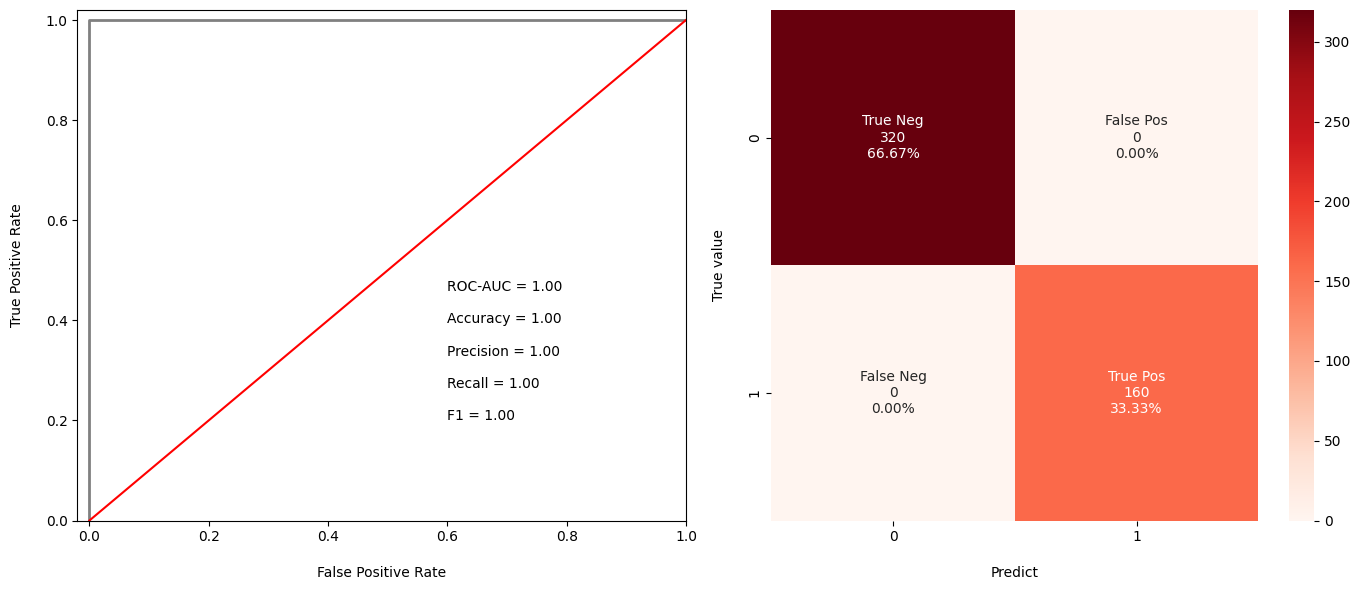

In [30]:
model_report(model_rfc, X_train, y_train, label='RandomForestClassifier')

In [31]:
y_pred = model_rfc.predict(X_train)
y_proba = model_rfc.predict_proba(X_train)
y_proba = y_proba[:, 1]

accuracy = f1_score(y_train, y_pred)

[[320   0]
 [  0 160]] 
 roc_auc_score 0.9999999999999999
 rec: 1.0
 prec: 1.0
 accuracy: 1.0
 f1: 1.0



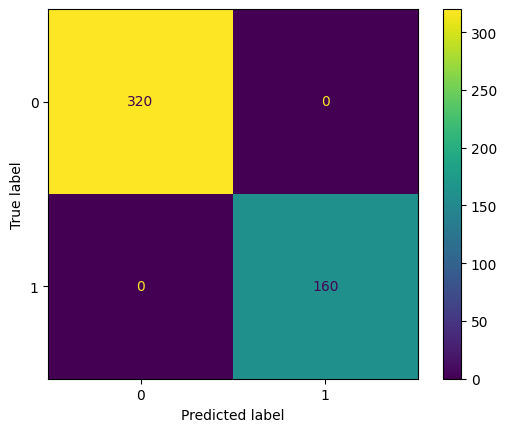

In [32]:
print(confusion_matrix(y_train, y_pred), '\n',
f'roc_auc_score {roc_auc_score(y_train, y_proba)}\n',
f'rec: {recall_score(y_train, y_pred)}\n',
f'prec: {precision_score(y_train, y_pred)}\n',
f'accuracy: {model_rfc.score(X_train, y_train)}\n',
f'f1: {f1_score(y_train, y_pred)}\n',)

predicted_train = model_rfc.predict(X_train)
cm = confusion_matrix(y_train, predicted_train, labels = model_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels = model_rfc.classes_)
disp.plot()
plt.show()

### Тестирование модели с параметрами по умолчанию

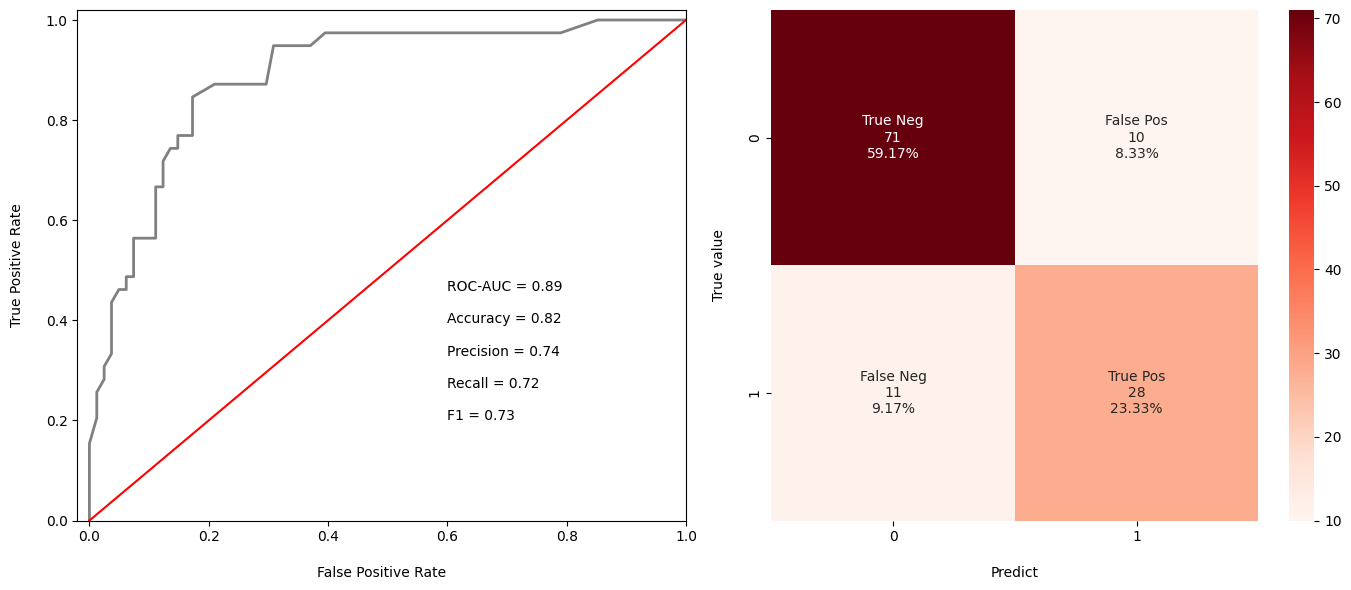

In [42]:
model_report(model_rfc, X_test, y_test, label='RandomForestClassifier')

Задание 4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

In [33]:
# Оцениваем производительность модели с помощью кросс-валидации
# Используем 5 фолдов
scores = cross_val_score(model_rfc, X, y, cv=5, scoring='accuracy')

In [34]:
# Выводим результаты
print("Точность модели на каждом фолде: ", scores)
print("Средняя точность: ", np.mean(scores))

Точность модели на каждом фолде:  [0.825      0.90833333 0.875      0.83333333 0.83333333]
Средняя точность:  0.8550000000000001


Задание 5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

In [35]:
# Определяем параметры для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [36]:
# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model_rfc, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

In [37]:
# Обучаем модель с помощью GridSearchCV
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [38]:
# Выводим результаты
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая точность: ", grid_search.best_score_)

Лучшие параметры:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Лучшая точность:  0.8550000000000001


Задание 6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

In [39]:
# Создаём модель леса с лучшими гиперпараметрами
best_model = RandomForestClassifier(n_estimators = 50,
                                    max_depth = 20,
                                    min_samples_split = 10,
                                    min_samples_leaf = 1)

# Обучаем на тренировочных данных
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=50)

### Результаты тренировки после подбора гиперпараметров

<ipython-input-19-af1bccefa84a>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9458333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Accuracy'] = accuracy
<ipython-input-19-af1bccefa84a>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.958904109589041' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Precision'] = precision
<ipython-input-19-af1bccefa84a>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Recall'] = recall
<ipython-input-19-af1bccefa84a>:18: FutureWarning: Setting an item o

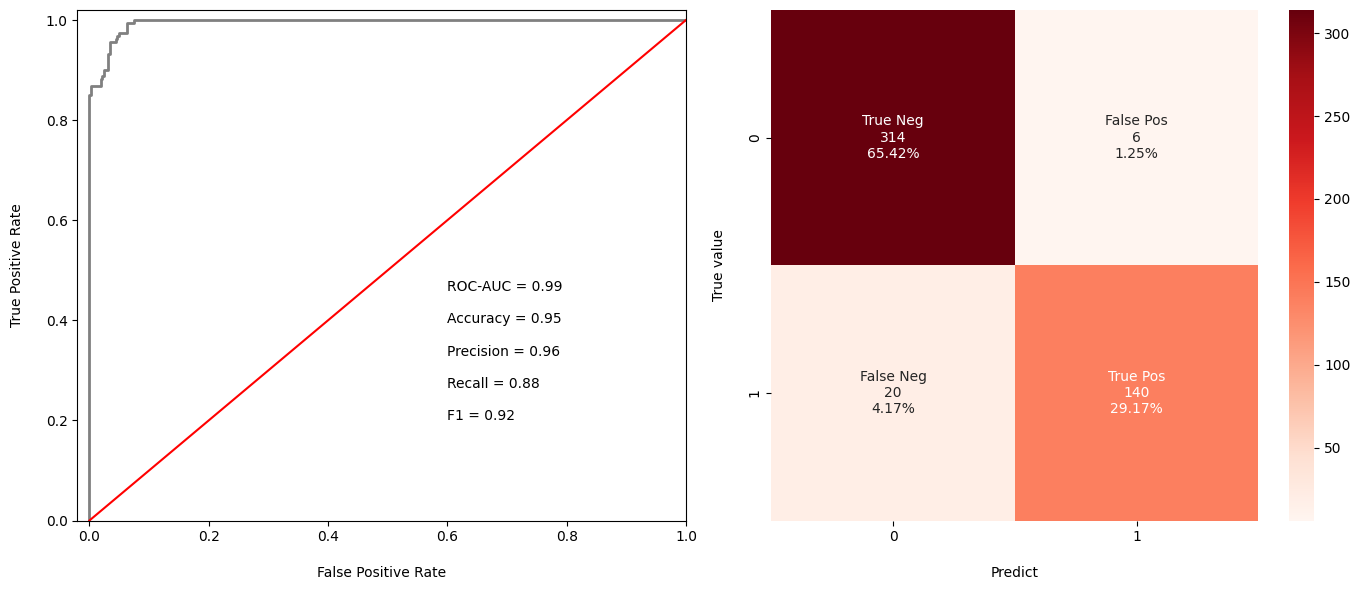

In [40]:
# выводим результаты тренировки
model_report(best_model, X_train, y_train, label='RandomForestClassifier')

### Результаты тестирования после подбора гиперпараметров

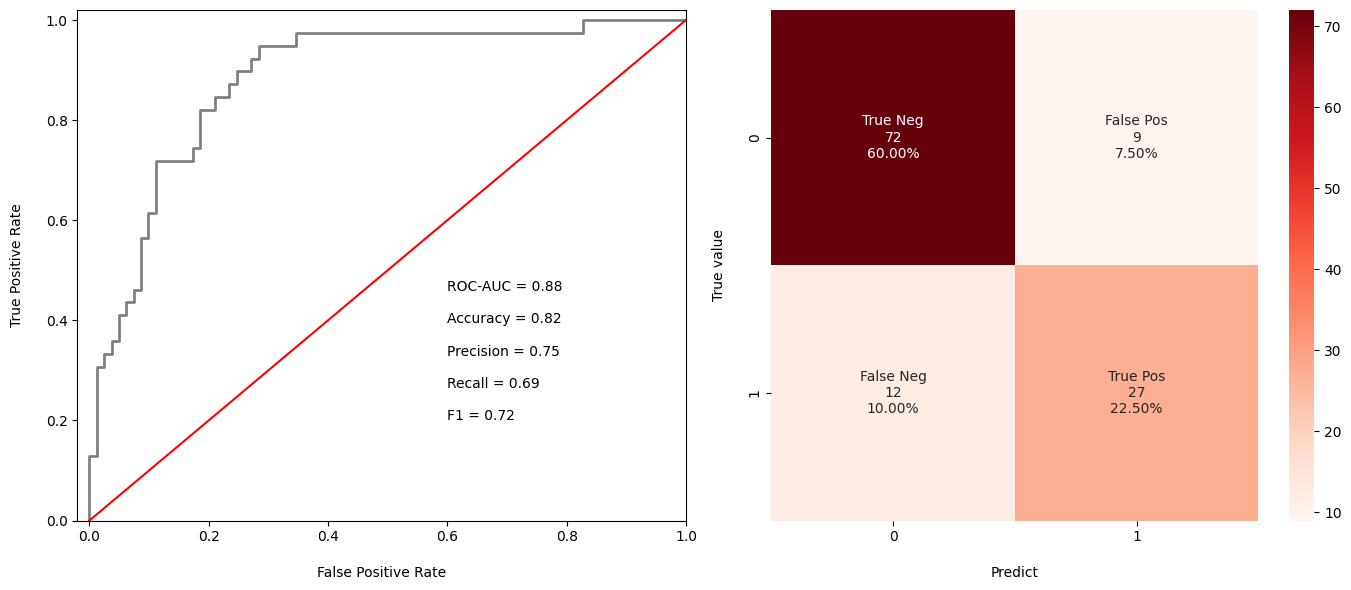

In [41]:
model_report(best_model, X_test, y_test, label='RandomForestClassifier')

## Выводы

Подбор гиперпараметров не принес ощутимой  пользы. Модель случайного леса с параметрами по умолчанию справляется с прогнозом не хуже, час с подобранными гиперпараметрами, что говорит о ее универсальности.